## Distribuição Binomial 
Na distribuição binomial temos sempre duas possibilidades de resultado (sucesso ou fracasso, cara ou coroa, etc.). Podemos então utilizar a distribuição binomial para simular o lançamento de uma moeda.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.binomial(1, 0.5)

0

Como simular o lançamento de duas moedas?

In [3]:
np.random.binomial(2, 0.5)

1

E se eu quiser simular 1.000 lançamentos de duas moedas?

In [4]:
np.random.binomial(2, 0.5, 1000)

array([0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 1, 2, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 2, 0, 1, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       2, 2, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1,
       1, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1,
       0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0,
       1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 2, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 2, 0,
       1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0,

Vamos agora guardar o resultado obtido numa variável e analisar esse resultado. Vimos, na parte teórica que se lançarmos duas moedas temos as seguintes probabilidades: \
0 caras -> P(0) = 0,25 \
1 cara  -> P(1) = 0,5 \
2 caras -> P(2) = 0,25 \
Vamos plotar o resultado de 1.000 lançamentos e analisar esse resultado.

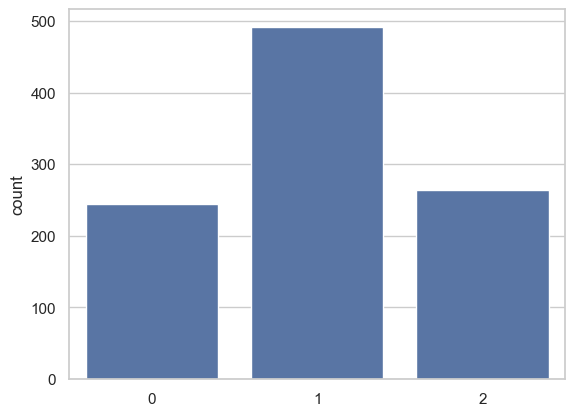

In [5]:
mil = np.random.binomial(2, 0.5, 1_000)

sns.set_theme(style='whitegrid')
sns.countplot(x=mil)
plt.show()

In [6]:
plt.close('all')

Vamos agora simular mil jogos de 10 moedas.

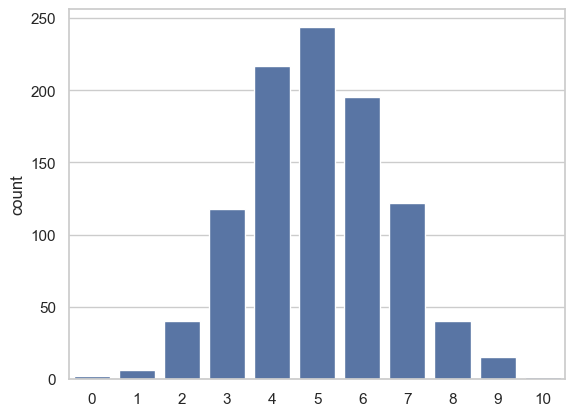

In [7]:
mil2 = np.random.binomial(10, 0.5, 1_000)

sns.set_theme(style='whitegrid')
sns.countplot(x=mil2)
plt.show()

In [8]:
plt.close('all')

Considere agora o seguinte problema: \
Uma manufatura tem uma taxa de defeitos de 12% na sua produção. Um comprador decide testar uma amostra de 20 peças aleatórias e só comprará da manufatura se encontrar duas ou menos peças defeituosas na amostra. Qual é a probabilidade de que a compra ocorra?

Na parte teórica, vimos que existem fórmulas matemáticas para realizar este cálculo. A linguagem Python provê o pacote SciPy para realizar esses cálculos. Veremos a seguir como usar o Scipy para resolver o problema acima.

In [9]:
from scipy.stats import binom

Para obter a probabilidade de que a compra ocorra, vamos utilizar a função cdf -- cumulative distribution function. Estamos usando essa função porque queremos calcular a probabilidade de termos até 2 peças defeituosas, ou seja, P(0) + P(1) + P(2) => portanto estamos acumulando (somando) as probabilidades. \
A função cdf tem 3 parâmetros: \
k - número máximo de peças defeituosas (cumulativo) \
n - número de peças da amostra \
p - probabilidade de peças defeituosas 

In [10]:
round(binom.cdf(2, 20, 0.12), 2)

0.56

E se quisermos descobrir a probabilidade de obtermos *exatamente* 2 peças defeituosas na amostra? \
Para tanto basta usar a função pmf -- probability mass function -- a qual tem os mesmos parâmetros que a função cdf.

In [11]:
round(binom.pmf(2, 20, 0.12), 2)

0.27

Para calcularmos o número médio de peças defeituosas por amostra, basta usar a função mean, com os parâmetros n e p.

In [12]:
p0 = binom.pmf(0, 20, 0.12)
p1 = binom.pmf(1, 20, 0.12)
p2 = binom.pmf(2, 20, 0.12)

print(p0, p1, p2)

psoma = p0 + p1 + p2
psoma

0.07756279363818958 0.2115348917405171 0.2740338370274882


0.5631315224061948

Vamos calcular o número médio de peças defeituosas dessa distribuição.

In [13]:
binom.mean(20, 0.12)

2.4

De forma similar, podemos obter o desvio padrão e a variância com as funções std e var.

In [14]:
binom.var(20, 0.12)

2.112

In [15]:
binom.std(20, 0.12)

1.453272169966796

Suponha agora que queremos obter a probabilidade de obtermos mais de 2 peças defeituosas na amostra. \
Existem duas possibilidades para isso: 
1) fazer 1 menos a probabilidade que calculamos 
2) utilizar a função sf -- survival function

In [16]:
1 - binom.cdf(2, 20, 0.12)

0.4368684775938054

In [17]:
binom.sf(2, 20, 0.12)

0.4368684775938054

Suponha agora que eu queira plotar um gráfico que mostre a probabilidade de ter 1, 2, 3, ... 20 peças defeituosas. Isto recebe o nome de distribuição de probabilidade. Vejamos como fazer isso.

In [18]:
eixo_x = np.arange(0, 21)
eixo_x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [19]:
eixo_y = binom.pmf(eixo_x, 20, 0.12)

for i in range(20):
    print(f'{i} - {eixo_y[i]:.4f}')

0 - 0.0776
1 - 0.2115
2 - 0.2740
3 - 0.2242
4 - 0.1299
5 - 0.0567
6 - 0.0193
7 - 0.0053
8 - 0.0012
9 - 0.0002
10 - 0.0000
11 - 0.0000
12 - 0.0000
13 - 0.0000
14 - 0.0000
15 - 0.0000
16 - 0.0000
17 - 0.0000
18 - 0.0000
19 - 0.0000


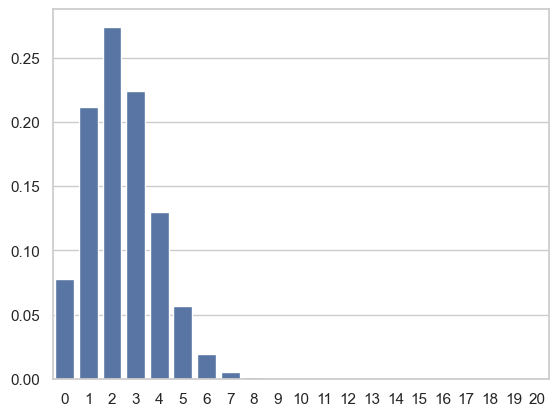

In [20]:
sns.barplot(x=eixo_x, y=eixo_y)
plt.show()

In [21]:
plt.close('all')

Podemos também fazer um gráfico mostrando a probabilidade cumulativa.

0 - 0.08
1 - 0.29
2 - 0.56
3 - 0.79
4 - 0.92
5 - 0.97
6 - 0.99
7 - 1.00
8 - 1.00
9 - 1.00
10 - 1.00
11 - 1.00
12 - 1.00
13 - 1.00
14 - 1.00
15 - 1.00
16 - 1.00
17 - 1.00
18 - 1.00
19 - 1.00


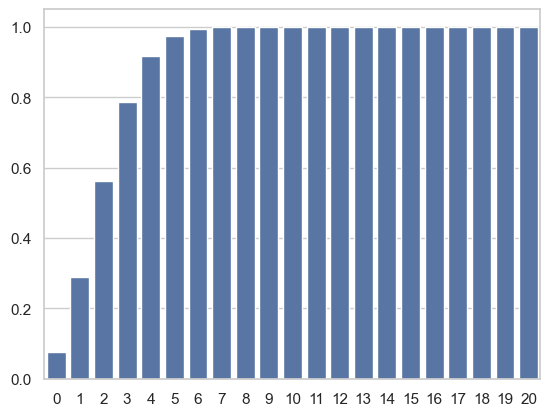

In [22]:
eixo_y2 = binom.cdf(eixo_x, 20, 0.12)

for i in range(20):
    print(f'{i} - {eixo_y2[i]:.2f}')

sns.barplot(x=eixo_x, y=eixo_y2)
plt.show()

Vamos agora realizar um experimento para confirmar as probabilidades calculadas. Inicialmente vamos analisar o resultado de 10 amostras e checar o número de peças defeituosas em cada amostra.

In [23]:
vet = np.random.binomial(20, 0.12, 10)
vet

array([1, 5, 1, 2, 1, 3, 5, 4, 1, 6])

Agora vamos gerar um vetor com o resultado de 1.000 amostras e utilizar esse vetor para plotar um gráfico.

In [24]:
vet = np.random.binomial(20, 0.12, 1000)
vet

array([1, 3, 2, 0, 2, 4, 3, 5, 3, 1, 2, 3, 1, 2, 3, 2, 4, 2, 4, 4, 2, 4,
       2, 3, 1, 1, 2, 5, 4, 1, 5, 2, 2, 1, 4, 2, 2, 4, 1, 2, 2, 4, 1, 0,
       2, 5, 2, 2, 2, 3, 0, 0, 4, 4, 4, 1, 1, 2, 2, 5, 1, 1, 2, 2, 3, 3,
       2, 6, 2, 1, 1, 2, 2, 1, 0, 2, 3, 2, 2, 4, 0, 2, 5, 5, 2, 4, 2, 2,
       1, 4, 4, 4, 5, 1, 4, 0, 3, 4, 4, 2, 3, 0, 3, 0, 2, 3, 3, 0, 2, 1,
       1, 4, 2, 5, 3, 1, 6, 4, 3, 2, 5, 1, 4, 2, 2, 4, 2, 4, 3, 3, 1, 2,
       2, 2, 2, 3, 1, 3, 3, 2, 6, 1, 1, 2, 3, 3, 4, 3, 1, 5, 2, 3, 0, 2,
       2, 4, 1, 2, 5, 6, 3, 2, 1, 6, 3, 3, 3, 2, 3, 2, 0, 2, 3, 4, 1, 3,
       1, 3, 6, 5, 1, 1, 2, 3, 3, 3, 1, 1, 5, 4, 2, 3, 2, 4, 3, 5, 1, 3,
       4, 3, 2, 5, 3, 2, 3, 4, 1, 0, 2, 3, 7, 3, 4, 2, 3, 2, 2, 3, 3, 1,
       6, 4, 1, 3, 0, 5, 3, 4, 2, 4, 1, 0, 2, 4, 0, 2, 1, 3, 2, 2, 2, 4,
       4, 0, 5, 1, 3, 1, 2, 5, 1, 2, 1, 1, 3, 3, 0, 2, 2, 3, 2, 2, 2, 2,
       2, 5, 3, 4, 2, 1, 2, 1, 5, 0, 4, 2, 0, 1, 3, 3, 3, 4, 3, 1, 1, 1,
       2, 2, 2, 4, 4, 4, 2, 0, 3, 1, 3, 1, 3, 5, 1,

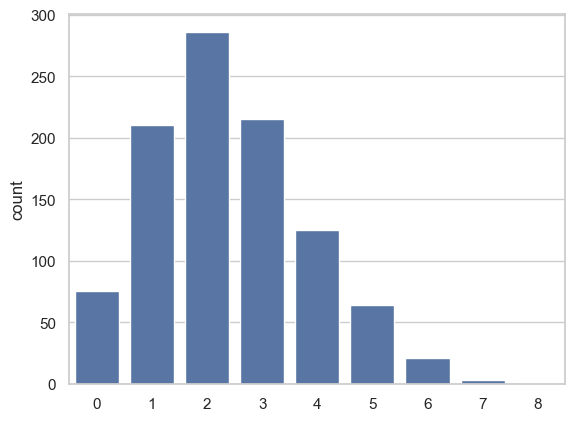

In [25]:
sns.countplot(x=vet)
plt.show()

In [26]:
plt.close('all')

Exercício 1 \
Se jogarmos uma moeda 10 vezes, qual é a probabilidade de aparecer exatamente 7 caras?

In [27]:
binom.pmf(7, 10, 0.5)

0.11718750000000004

Exercício 2 \
Se jogarmos uma moeda 10 vezes, qual é a probabilidade de aparecer exatamente 7 ou mais caras?

In [28]:
print(sum(binom.pmf([7, 8, 9, 10], 10, 0.5)))

print(binom.cdf(3, 10, 0.5))


0.1718750000000001
0.171875


Exercício 3 \
4 peças foram selecionadas de um lote cuja probabilidade de defeito é de 10%. Qual é a probabilidade de termos 0 peças defeituosas na seleção?

In [29]:
binom.pmf(0, 4, 0.1)

0.6560999999999997

Exercício 4 \
Plote um gráfico que exiba a distribuição de probabilidade do problema descrito no exercício 3.

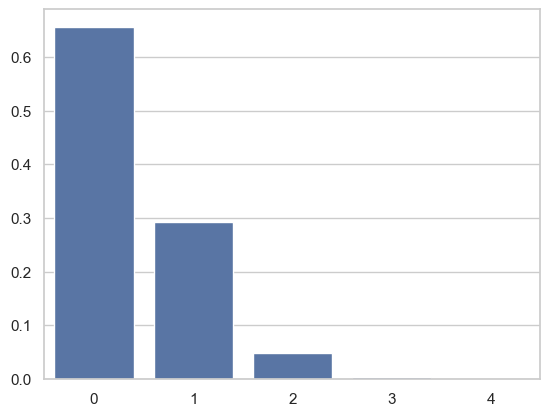

In [30]:
x_axis = np.arange(5)
y_axis = binom.pmf(x_axis, 4, 0.1)

sns.barplot(x=x_axis, y=y_axis)
plt.show()

In [31]:
plt.close('all')

Exercício 5 \
Um teste de múltipla escolha apresenta 4 opções por questão, e 14 questões. Se a aprovação depende de 9 ou mais respostas corretas: \
a) qual a probabilidade de um estudante que responde “no chute” ser aprovado? \
b) se 500 estudantes fazem o teste, qual o número esperado de estudantes aprovados, tendo “chutado” as respostas?

In [32]:
print(binom.cdf(5, 14, 0.25))

binom.sf(8, 14, 0.25) # ✅

0.8883310295641422


0.002154175192117691

Exercício 6 \
Um apostador que nada entende de futebol marcou um cartão de loteria esportiva, que tem 16 jogos, realizando apenas apostas simples (ou seja, marcando somente uma das três opções: time A vence, times A e B empatam, time B ganha). Plote um gráfico de barras que mostre a probabilidade de 0, 1, 2, ... 16 acertos.

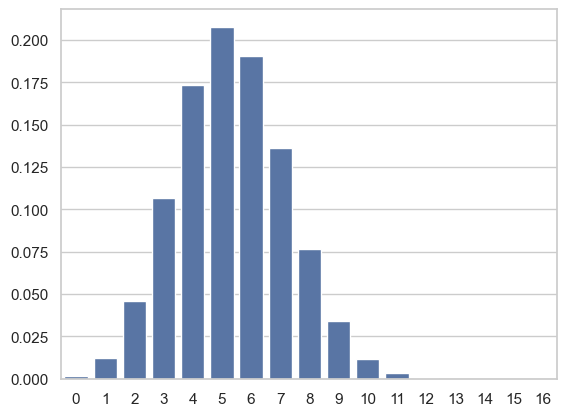

In [33]:
x_axis = np.arange(0, 17)
y_axis = binom.pmf(x_axis, 16, (1/3))

sns.barplot(x=x_axis, y=y_axis)
plt.show()

In [34]:
plt.close('all')